# Capstone Project Exploratory Data Analysis Notebook:
**Author: Matthew Johnescu**

# Table of Contents:
- [Introduction](#introduction:)
    - [Business Problem Statement](##business-problem-statement) 
    - [Notebook Purpose](##notebook-purpose)
    - [Notebook Imports](##notebook-imports)
    - [Loading Data](##loading-data)
- [Description of Data](#description-of-data)
    - [Overview of Variables](overview-of-variables)
    - [Glypse of Data](glypse-of-data)
    - [Overview of Data Statistics](##overvoew-of-data-statistics)
- [Discussion of Missing Values](#discussion-of-missing-values)
- [Data Exploration](#data-exploration)

# Introduction:

## Busines Problem Statement:
Swire Coca-Cola has six production plants to meet the demand of 192 million cases of various beverages from 13 different states. These plants are currently only able to meet 94.4% of the demand. One of the reasons these plants fall short of meeting the total product demand is that they are plagued with unplanned downtime. This downtime is caused by various failure modes like maintenance, mechanical failure, general wear and tear, etc. 
 
Extensive repairs result in lengthy downtimes that generate work orders in the IWC system.  The long lead times caused by these work orders cost Swire Coca-Cola $60 million annually in production losses.  
 
The purpose of this project is to create a predictive model to identify machines at risk of failure to prevent downtime and optimize Swire Coca-Cola's plant machine maintenance.



## Notebook Purpose:
The purpose of this notebook is to better understand which varibles will be the best for predicting machine downtime, visualize the structure of the data, and explain features that will be used during the modeling phase.


## Notebook Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data:

In [2]:
# Define the path to your CSV file
# file_path = r"C:/Users/johne/Downloads/IWC_Work_Orders_Extract.csv"
file_path = r"C:/Users/matt/Downloads/IWC_Work_Orders_Extract.csv"
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

C:\Users\matt\AppData\Local\Temp\ipykernel_17368\608475065.py:5: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# Description of Data:

## Overview of Variables:

**Column Definitions:**

- `ORDER_ID`: An identifier used to uniquely map every order raised in IWC

- `PLANT_ID`: Helps uniquely identify all factories of Swire Coca-Cola, between Monza, Cota, Silverstone, Monaco, Roma, and Suzuka

- `PRODUCTION_LOCATION`: Text description of `PLANT_ID`

- `EXECUTION_START_DATE`: The date on which work began on the said issue

- `EXECUTION_FINISH_DATE`: The date on which work ended to resolve said issue

- `ACTUAL_START_TIME`: The time at which work began on resolving said issue*

- `ACTUAL_FINISH_TIME`: The time at which work ended on resolving said issue*

- `ACTUAL_WORK_IN_MINUTES`: The time it took, in minutes, to resolve said issue*
- `MAINTENANCE_PLAN`: If the maintenance task was planned, this would have the plan ID. If this column is null, it implies that the maintenance was unplanned
- `MAINTENANCE_ITEM`: If the maintenance task was planned, for example, this bearing needs to be changed every six weeks, then the plan in the IWC system will have a code allocated to it, indicating that this bearing code maintenance will repeat at X interval. The serial number in this column maps to bearings (mapping not provided for security reasons)
- `MAINTENANCE_ACTIVITY_TYPE`: Lets you know if the maintenance was planned or unplanned, as an additional flag
- `ORDER_DESCRIPTION`: The description entered by the mechanic regarding the actual work that was carried out in the fix
- `MAINTENANCE_TYPE_DESCRIPTION`: Indicates if the work order was preventive in nature (i.e., done to prevent breakdowns in future) or corrective in nature (i.e., done to correct something that caused a downtime)
- `FUNCTIONAL_LOC`: Works like an IP address. Helps locate each machine by plant – process – sub-process – product line – machine. It is broken down into nodes for better analysis
- `FUNCTIONAL_AREA_NODE_1_MODIFIED`: The functional area within said plant – production, fleet, HVAC, etc.
- `FUNCTIONAL_AREA_NODE_2_MODIFIED`: The region-based subset of the functional area – Is it the blender room, the assembly lines (can, bottle, or bibs)
- `FUNCTIONAL_AREA_NODE_3_MODIFIED`: Within each region, which subset of equipment this work order belongs to
- `FUNCTIONAL_AREA_NODE_4_MODIFIED`: Within line groupings, which line is it specifically referring to – contains line number
- `FUNCTIONAL_AREA_NODE_5_MODIFIED`: Further splits the line into individual machine types
- `EQUIPMENT_ID`: Helps identify which component within a larger machine (e.g., filler) the work was done on, such as a smaller component in the filler
- `EQUIPMENT_DESC5`: Helps identify what the component is. Note that a description may not always be available due to some components being either too small to classify or proprietary
- `EQUIPMENT_CAT_DESC`: Identifies if the fixed part was on a machine, a vehicle, an HVAC system, etc.
- `EQUIP_START_UP_DATE`: The date on which this machine was acquired **
- `EQUIP_VALID_FROM`: The date on which this machine became functional **
- `EQUIP_VALID_TO`: The date until which this machine shall be used **


Comment:
- Data reflects different occurances of break downs in the Swire Coca-Cola production facilities.
- Note that only severe breakdowns make it to having a work order issued against them. Therefore, not all breakdowns recorded on the factory floor will have IWC work orders issued against them. An analysis of location, description and package line might be a great place to get started.


## Glypse of Data:

In [3]:
# Display the first 5 rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

Head of the DataFrame:
    ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
0  705642457     G812                ROMA           2024-05-04   
1  704191697     G812                ROMA           2022-09-13   
2  704466547     G812                ROMA           2022-12-21   
3  703834477     G812                ROMA           2022-07-04   
4  704661125     G291               MONZA           2023-03-15   

  EXECUTION_FINISH_DATE ACTUAL_START_TIME ACTUAL_FINISH_TIME  \
0            2024-05-12      06:00:00.000       23:04:08.000   
1            2022-09-13      06:00:00.000       17:17:24.000   
2            2022-12-21      07:00:00.000       07:00:00.000   
3            2022-07-04      06:00:00.000       06:00:00.000   
4            2023-03-15      07:00:00.000       07:00:00.000   

   ACTUAL_WORK_IN_MINUTES MAINTENANCE_PLAN  MAINTENANCE_ITEM  ...  \
0                   390.0              NaN               NaN  ...   
1                   420.0              NaN               

Comment:


## Overview of Data Statistics:

In [4]:
# Function to show unique values and data types
def unique_values_and_data_types(df):
    # Creating a DataFrame to store unique values and data types
    unique_df = pd.DataFrame()
    unique_df['#Unique_Values'] = df.nunique()
    unique_df['Data_Type'] = df.dtypes
    unique_df['Unique_Values'] = df.apply(lambda x: x.unique())
    return unique_df

# Displaying the unique values and data types
print("Unique Values and Data Types")
print(unique_values_and_data_types(df))

Unique Values and Data Types
                                 #Unique_Values Data_Type  \
ORDER_ID                                1427244     int64   
PLANT_ID                                      6    object   
PRODUCTION_LOCATION                           6    object   
EXECUTION_START_DATE                       2956    object   
EXECUTION_FINISH_DATE                      2956    object   
ACTUAL_START_TIME                         65927    object   
ACTUAL_FINISH_TIME                        61388    object   
ACTUAL_WORK_IN_MINUTES                     4801   float64   
MAINTENANCE_PLAN                           3308    object   
MAINTENANCE_ITEM                           4021   float64   
MAINTENANCE_ACTIVITY_TYPE                     2    object   
ORDER_DESCRIPTION                        118925    object   
MAINTENANCE_TYPE_DESCRIPTION                  5    object   
FUNCTIONAL_LOC                              667    object   
FUNCTIONAL_AREA_NODE_1_MODIFIED               7    objec

Comment:

# Discussion of Missing Values:


In [5]:
# Function to print null values and their percentage
def null_values_percentage(df):
    total = len(df)
    # Creating a DataFrame to store null values and their percentage
    null_df = pd.DataFrame(df.isnull().sum(), columns=['#NULLS'])
    null_df['%NULLS'] = round((null_df['#NULLS'] / total) * 100, 5)
    return null_df

print("\nNull Values and Percentage")
print(null_values_percentage(df))


Null Values and Percentage
                                  #NULLS    %NULLS
ORDER_ID                               0   0.00000
PLANT_ID                               0   0.00000
PRODUCTION_LOCATION                    0   0.00000
EXECUTION_START_DATE                   0   0.00000
EXECUTION_FINISH_DATE                  0   0.00000
ACTUAL_START_TIME                      0   0.00000
ACTUAL_FINISH_TIME                     0   0.00000
ACTUAL_WORK_IN_MINUTES                 0   0.00000
MAINTENANCE_PLAN                 1274670  89.30864
MAINTENANCE_ITEM                 1274670  89.30864
MAINTENANCE_ACTIVITY_TYPE              0   0.00000
ORDER_DESCRIPTION                1135497  79.55760
MAINTENANCE_TYPE_DESCRIPTION     1135469  79.55564
FUNCTIONAL_LOC                   1135482  79.55655
FUNCTIONAL_AREA_NODE_1_MODIFIED  1137147  79.67321
FUNCTIONAL_AREA_NODE_2_MODIFIED  1144857  80.21340
FUNCTIONAL_AREA_NODE_3_MODIFIED  1168573  81.87504
FUNCTIONAL_AREA_NODE_4_MODIFIED  1189691  83.35466
FUN

Comment:

The data includes several columns with significant amounts of missing values, which may have implications for analysis and modeling. Here is a summary of the columns with the highest percentages of missing values:

1. `MAINTENANCE_PLAN` and `MAINTENANCE_ITEM`: Both columns have approximately 89.31% missing values, which suggests that maintenance information is not frequently recorded for many entries. This could impact the predictive power of maintenance-related features.
  
2. `ORDER_DESCRIPTION`, `MAINTENANCE_TYPE_DESCRIPTION`, and `FUNCTIONAL_LOC`: These columns have approximately 79.56-79.67% missing values, indicating that order descriptions and maintenance type details are often omitted.

3. `FUNCTIONAL_AREA_NODE_X_MODIFIED` (where X ranges from 1 to 5): Missing values increase with the depth of the functional area nodes, with `FUNCTIONAL_AREA_NODE_5_MODIFIED` having 99.85% missing values. This pattern suggests that lower-level details are not often captured, which might reduce the granularity available for analyzing functional area details.

4. `EQUIPMENT_DESC`, `EQUIP_CAT_DESC`, `EQUIP_START_UP_DATE`, `EQUIP_VALID_FROM`, and `EQUIP_VALID_TO`: All these columns have about 94.43% missing values. This high percentage may limit the ability to analyze equipment-based trends effectively.

These high levels of missing data suggests that many columns contain incomplete records, which may necessitate careful handling—either through imputation, exclusion, or deriving insights from available non-missing data points. Depending on the context, it may also make sense to consider the impact of these missing values on downstream analysis and model accuracy.


# Data Exploration:

## Descriptive Statistics for Numeric and Catigorical Variables:

In [6]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Display descriptive statistics
df[numerical_cols].describe()

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display value counts for each categorical column
for col in categorical_cols:
    print(f'Value counts for {col}:')
    print(df[col].value_counts(dropna=False))
    print('\n')



Value counts for PLANT_ID:
PLANT_ID
G261    630903
G221    290975
G291    225279
G816    116303
G811     84694
G812     79110
Name: count, dtype: int64


Value counts for PRODUCTION_LOCATION:
PRODUCTION_LOCATION
SILVERSTONE    630903
SUZUKA         290975
MONZA          225279
COTA           116303
MONACO          84694
ROMA            79110
Name: count, dtype: int64


Value counts for EXECUTION_START_DATE:
EXECUTION_START_DATE
2019-04-16    936
2018-09-12    908
2018-08-08    900
2023-05-23    895
2019-01-23    892
             ... 
2024-08-30      4
2013-08-19      1
2021-12-25      1
2016-07-25      1
2016-07-28      1
Name: count, Length: 2956, dtype: int64


Value counts for EXECUTION_FINISH_DATE:
EXECUTION_FINISH_DATE
2019-04-16    934
2023-12-04    924
2018-09-12    914
2024-06-13    911
2019-01-23    902
             ... 
2016-07-30     12
2021-12-25      6
2016-12-25      4
2016-07-25      1
2016-07-29      1
Name: count, Length: 2956, dtype: int64


Value counts for ACTUAL_ST

## Balance of Unplanned and Planned Maintenance:

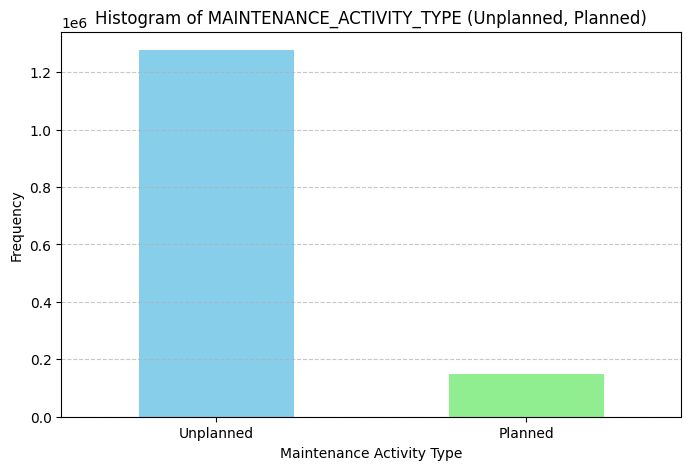

In [7]:
df = pd.DataFrame(df)

# Creating a histogram of 'MAINTENANCE_ACTIVITY_TYPE' values
plt.figure(figsize=(8, 5))
df['MAINTENANCE_ACTIVITY_TYPE'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Frequency')
plt.title('Histogram of MAINTENANCE_ACTIVITY_TYPE (Unplanned, Planned)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

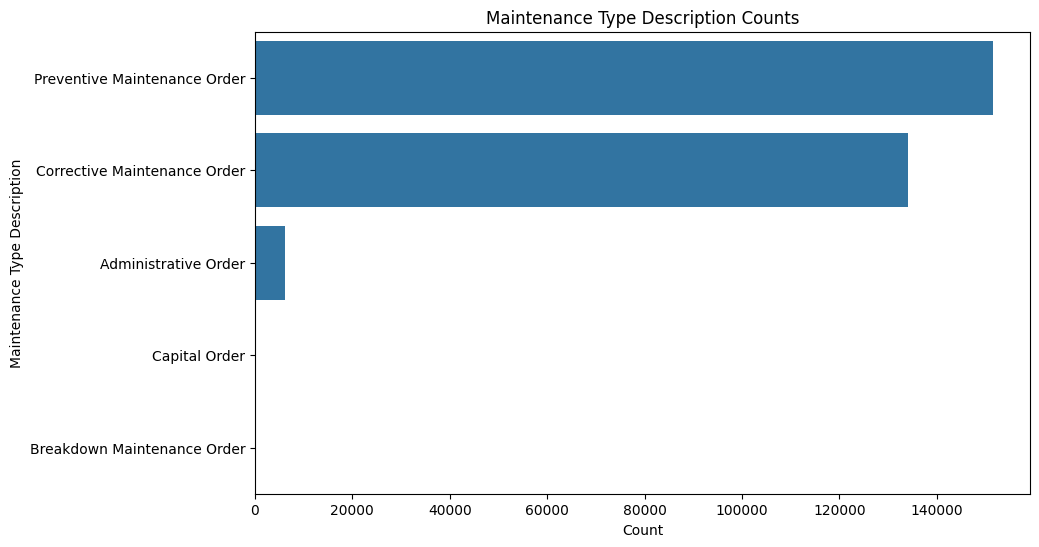

In [8]:
# Analyze MAINTENANCE_TYPE_DESCRIPTION
maintenance_type_counts = df['MAINTENANCE_TYPE_DESCRIPTION'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=maintenance_type_counts.values, y=maintenance_type_counts.index)
plt.title('Maintenance Type Description Counts')
plt.xlabel('Count')
plt.ylabel('Maintenance Type Description')
plt.show()


Comment: 
- A very large portion of Maintenance is deemed as corrective, meaning it does not relect a prevention activity and could potentially be used to better understand which actitivies are unplanned.

## Equipment Analysis

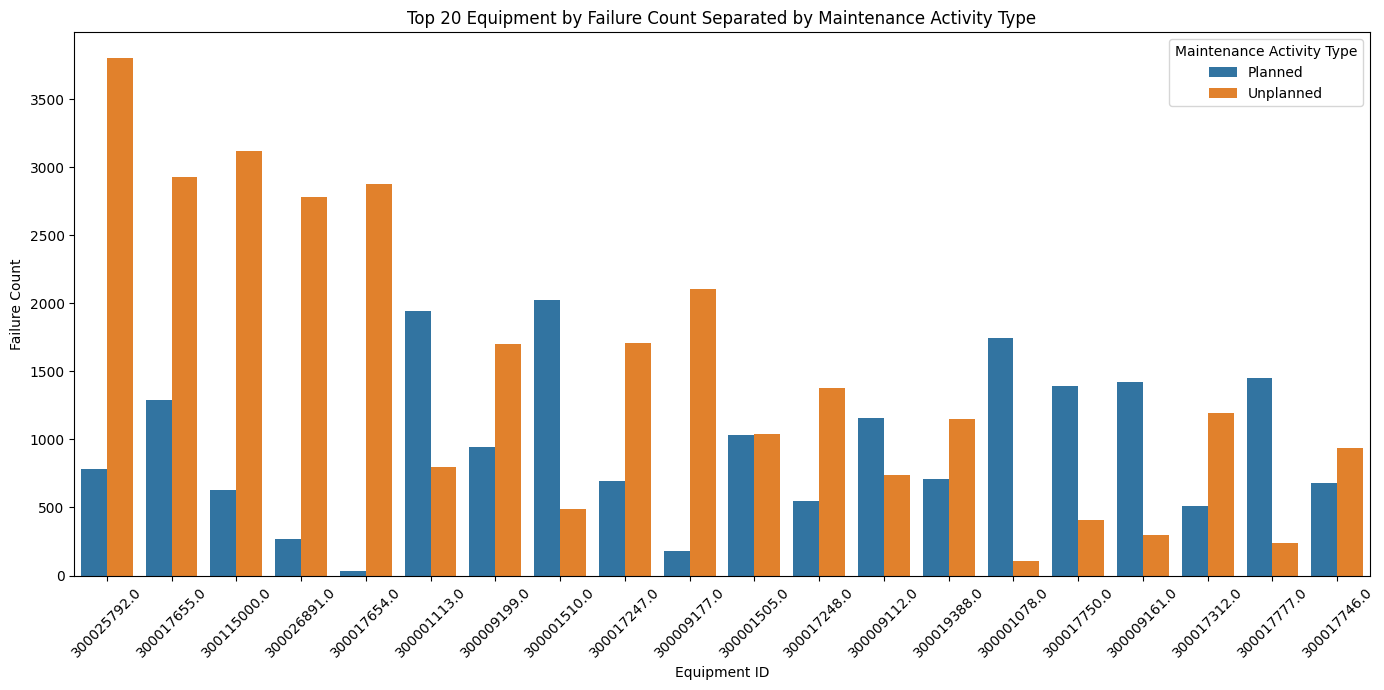

In [9]:
# Count the total number of failures per EQUIPMENT_ID
equipment_failures = df['EQUIPMENT_ID'].value_counts().reset_index()
equipment_failures.columns = ['EQUIPMENT_ID', 'Failure_Count']

# Identify the top 20 equipment with the highest failure rates
top_equipment_ids = equipment_failures['EQUIPMENT_ID'].head(20)
equipment_order = top_equipment_ids.tolist()

# Filter the original data to include only these top 20 equipment IDs
df_top_equipment = df[df['EQUIPMENT_ID'].isin(top_equipment_ids)]

# Group by EQUIPMENT_ID and MAINTENANCE_ACTIVITY_TYPE, and count the number of failures
failure_counts = df_top_equipment.groupby(['EQUIPMENT_ID', 'MAINTENANCE_ACTIVITY_TYPE']).size().reset_index(name='Failure_Count')

# Ensure the EQUIPMENT_ID is ordered according to the top 20
failure_counts['EQUIPMENT_ID'] = pd.Categorical(failure_counts['EQUIPMENT_ID'], categories=equipment_order, ordered=True)

# Create the bar plot
plt.figure(figsize=(14,7))
sns.barplot(
    x='EQUIPMENT_ID',
    y='Failure_Count',
    hue='MAINTENANCE_ACTIVITY_TYPE',
    data=failure_counts,
    order=equipment_order
)
plt.title('Top 20 Equipment by Failure Count Separated by Maintenance Activity Type')
plt.xlabel('Equipment ID')
plt.ylabel('Failure Count')
plt.xticks(rotation=45)
plt.legend(title='Maintenance Activity Type')
plt.tight_layout()
plt.show()




Comment: 
- Some equipment has a lot more failures than others. 
- Although preventative 'PLANNED' maintenance is in place, equipment is still having 'UNPLANNED' failures. 

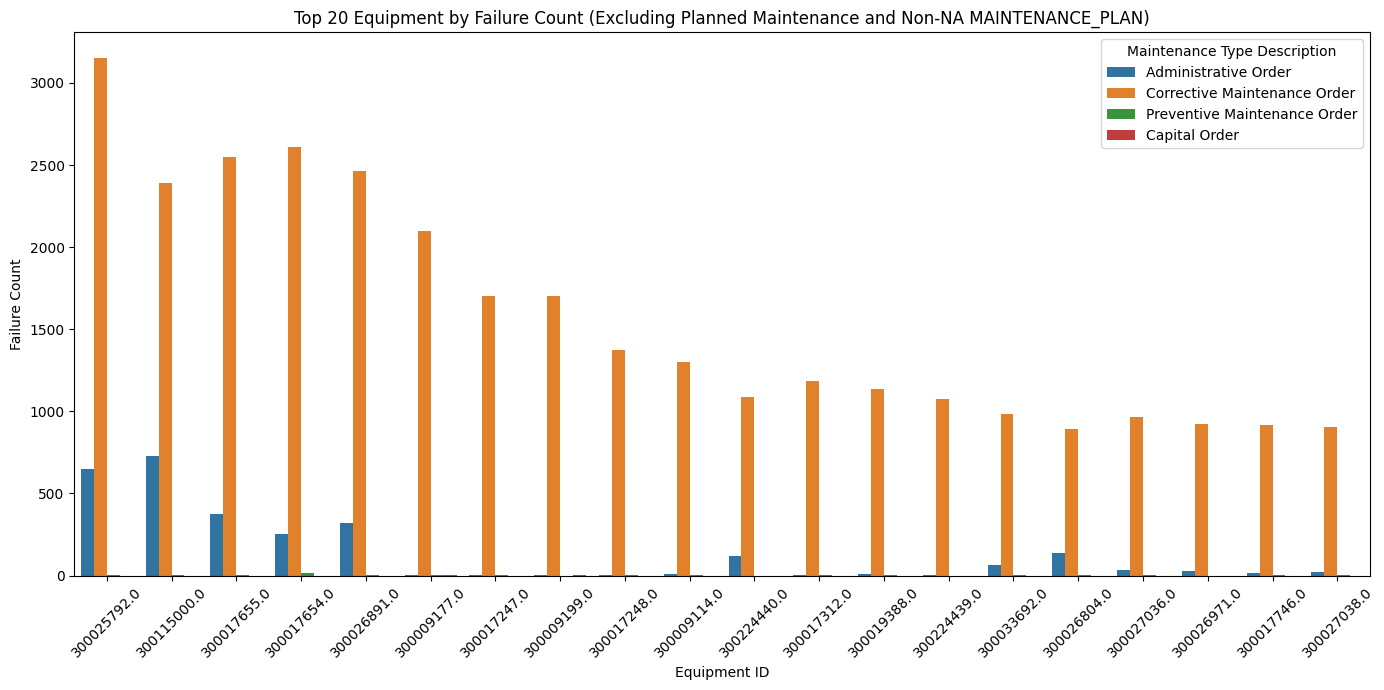

In [18]:
# Filter the data to exclude 'Planned' maintenance and exclude records where MAINTENANCE_PLAN is not NA
df_filtered = df[
    (df['MAINTENANCE_ACTIVITY_TYPE'] != 'Planned') & 
    (df['MAINTENANCE_PLAN'].isna())
]

# Count the total number of failures per EQUIPMENT_ID in the filtered data
equipment_failures = df_filtered['EQUIPMENT_ID'].value_counts().reset_index()
equipment_failures.columns = ['EQUIPMENT_ID', 'Failure_Count']

# Identify the top 20 equipment with the highest failure rates
top_equipment_ids = equipment_failures['EQUIPMENT_ID'].head(20)
equipment_order = top_equipment_ids.tolist()

# Filter the filtered data to include only these top 20 equipment IDs
df_top_equipment = df_filtered[df_filtered['EQUIPMENT_ID'].isin(top_equipment_ids)]

# Group by EQUIPMENT_ID and MAINTENANCE_TYPE_DESCRIPTION (since MAINTENANCE_ACTIVITY_TYPE is no longer 'Planned')
failure_counts = df_top_equipment.groupby(['EQUIPMENT_ID', 'MAINTENANCE_TYPE_DESCRIPTION']).size().reset_index(name='Failure_Count')

# Ensure the EQUIPMENT_ID is ordered according to the top 20
failure_counts['EQUIPMENT_ID'] = pd.Categorical(failure_counts['EQUIPMENT_ID'], categories=equipment_order, ordered=True)

# Create the bar plot
plt.figure(figsize=(14,7))
sns.barplot(
    x='EQUIPMENT_ID',
    y='Failure_Count',
    hue='MAINTENANCE_TYPE_DESCRIPTION',
    data=failure_counts,
    order=equipment_order
)
plt.title('Top 20 Equipment by Failure Count (Excluding Planned Maintenance and Non-NA MAINTENANCE_PLAN)')
plt.xlabel('Equipment ID')
plt.ylabel('Failure Count')
plt.xticks(rotation=45)
plt.legend(title='Maintenance Type Description')
plt.tight_layout()
plt.show()


      EQUIPMENT_ID  ACTUAL_WORK_IN_MINUTES
1383   300025792.0                484506.0
866    300017654.0                404193.6
558    300009177.0                390294.6
867    300017655.0                376677.0
2152   300115000.0                331877.4
1296   300019388.0                312627.6
578    300009199.0                288931.8
699    300017247.0                287203.8
1478   300026891.0                276619.8
754    300017312.0                258616.8
1271   300019362.0                252405.0
376    300001505.0                238962.0
497    300009114.0                229947.6
378    300001509.0                219696.6
700    300017248.0                216219.0
755    300017313.0                209338.2
379    300001510.0                198628.2
115    300001113.0                176932.2
950    300017746.0                169419.6
495    300009112.0                149377.2


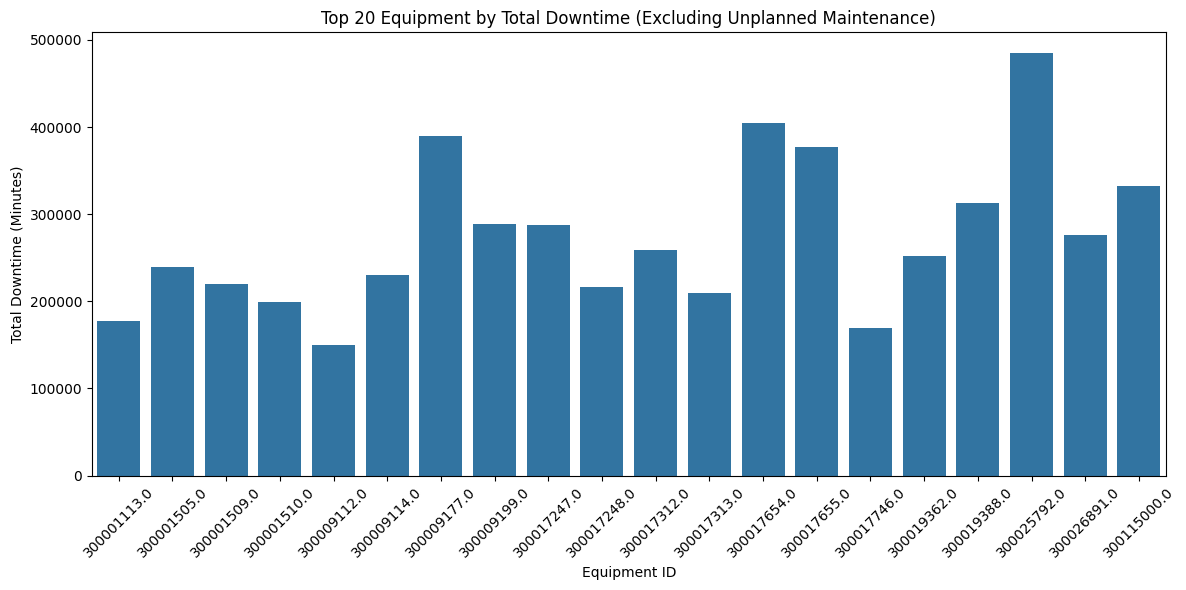

In [15]:
# Exclude 'UNPLANNED' maintenance from the data
# Adjust the string case if necessary, depending on how 'MAINTENANCE_ACTIVITY_TYPE' is recorded in your dataset
df_unplanned = df[df['MAINTENANCE_ACTIVITY_TYPE'] != 'PLANNED']

# Alternatively, to make it case-insensitive:
# df_planned = df[~df['MAINTENANCE_ACTIVITY_TYPE'].str.upper().eq('UNPLANNED')]

# Total downtime per equipment (excluding 'UNPLANNED' maintenance)
equipment_downtime_total = df_unplanned.groupby('EQUIPMENT_ID')['ACTUAL_WORK_IN_MINUTES'].sum().reset_index()

# Get top 20 equipment with highest downtime
top_equipment_downtime = equipment_downtime_total.sort_values(by='ACTUAL_WORK_IN_MINUTES', ascending=False).head(20)

print(top_equipment_downtime)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x='EQUIPMENT_ID', y='ACTUAL_WORK_IN_MINUTES', data=top_equipment_downtime)
plt.title('Top 20 Equipment by Total Downtime (Excluding Unplanned Maintenance)')
plt.xlabel('Equipment ID')
plt.ylabel('Total Downtime (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Comment: 
- How does time period come into play? 